# Iraq Students Performance Prediction

### Project Overview:


                     The Student Exam Performance Prediction project is a data-driven endeavor that aims to develop a predictive model to forecast students' academic performance based on a variety of relevant features. This project leverages historical student data, including personal, socio-economic, and educational information, to create a model that can assist educators and institutions in identifying students who may be at risk of academic challenges and in making data-informed decisions to improve student outcomes.

## Import The Dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##  Data Collection & Analysis

### Feature Engineering: 

 The project will involve extensive feature engineering, where raw data is preprocessed, missing values are handled, categorical variables are encoded, and relevant features are selected to improve model performance.

In [45]:
## loading tha data from csv file to a pandas DataFrame

df=pd.read_excel(r"Documents\Iraqi Student Performance Prediction.xlsx")

In [46]:
df.head()

,Student_ID,Sex,Social Status,Age,Governorate,Living,Mother education,Father education,Family member Education,Father Alive,...,economy/bio,Avg1,Islamea.1,arabic.1,english.1,math.1,physics.1,chemistry.1,economy/bio.1,Avg1.1
0,1,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,70,55,69,50,60,41,59,50,69,57
1,2,Male,single,3,baghdad,city,medium,higher,yes,yes,...,87,70,65,87,68,85,64,61,69,71
2,3,Male,single,2,baghdad,city,Illiterate,secondary,no,yes,...,58,54,44,50,46,45,55,30,43,45
3,4,Male,coupled,3,baghdad,city,ba,ba,yes,yes,...,92,73,60,55,60,55,70,73,80,65
4,5,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,60,34,40,32,28,25,35,25,40,32


In [48]:
df["Sex"].value_counts()

Female    84
Male      35
Male       1
Name: Sex, dtype: int64

In [6]:
## finding the number rows & columns 

df.shape

(120, 56)

In [7]:
## finding the variable types

df.dtypes

Student_ID                   int64
Sex                         object
Social Status               object
Age                          int64
Governorate                 object
Living                      object
Mother education            object
Father education            object
Family member Education     object
Father Alive                object
Mother Alive                object
Family Size                  int64
Parent Apart                object
The Guardian                object
Family Relationship         object
Father Job                  object
Mother Job                  object
Education Fee               object
Secondary Job               object
Home Ownership              object
Study Room                  object
Family Economic Level       object
You  chronic disease        object
Family Chronic Disease      object
Specialization              object
Study willing               object
Reason of study             object
Attendance                  object
Failure Year        

In [8]:
#check the null values

df.isna().sum()

Student_ID                   0
Sex                          0
Social Status                0
Age                          0
Governorate                  0
Living                       0
Mother education             0
Father education             0
Family member Education      0
Father Alive                 0
Mother Alive                 0
Family Size                  0
Parent Apart                 0
The Guardian                99
Family Relationship          0
Father Job                   0
Mother Job                   0
Education Fee                0
Secondary Job                0
Home Ownership               0
Study Room                   0
Family Economic Level        0
You  chronic disease         0
Family Chronic Disease       0
Specialization               0
Study willing                0
Reason of study              0
Attendance                   0
Failure Year                 0
Higher Education Willing     0
References Usage             0
Internet Usage               0
TV Usage

In [9]:


df.describe()

,Student_ID,Age,Family Size,Internet Usage,TV Usage,Sleep Hour,Study Hour,Arrival Time,Islamea,arabic,...,economy/bio,Avg1,Islamea.1,arabic.1,english.1,math.1,physics.1,chemistry.1,economy/bio.1,Avg1.1
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,60.500000,2.166667,0.500000,0.500000,0.141667,1.158333,2.008333,0.208333,72.000000,55.716667,...,72.658333,65.425000,62.300000,59.575000,68.816667,63.250000,58.475000,52.225000,69.016667,61.925000
std,34.785054,0.539737,0.648204,0.744729,0.435713,0.788529,0.939299,0.407819,14.454798,14.795061,...,17.950677,15.591779,15.542082,14.690455,19.857891,20.539059,21.317118,22.749074,18.704236,15.760371
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,14.000000,...,32.000000,32.000000,29.000000,30.000000,0.000000,21.000000,12.000000,0.000000,26.000000,31.000000
25%,30.750000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,61.750000,45.000000,...,60.000000,55.000000,49.000000,48.000000,56.000000,46.000000,41.000000,35.000000,58.000000,50.750000
50%,60.500000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,73.000000,56.000000,...,71.000000,65.000000,63.000000,59.500000,70.000000,62.000000,59.000000,50.000000,70.000000,61.000000
75%,90.250000,2.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,83.250000,65.000000,...,89.000000,78.000000,74.250000,70.000000,82.250000,79.250000,75.000000,72.000000,84.250000,74.000000
max,120.000000,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,100.000000,91.000000,...,100.000000,96.000000,96.000000,87.000000,100.000000,100.000000,99.000000,97.000000,100.000000,95.000000


## EDA

 Exploratory data analysis and data visualization techniques will be used to gain insights into the dataset. Understanding the relationships between features and student performance will be essential in building an effective predictive model.

## plotting the distribution of age

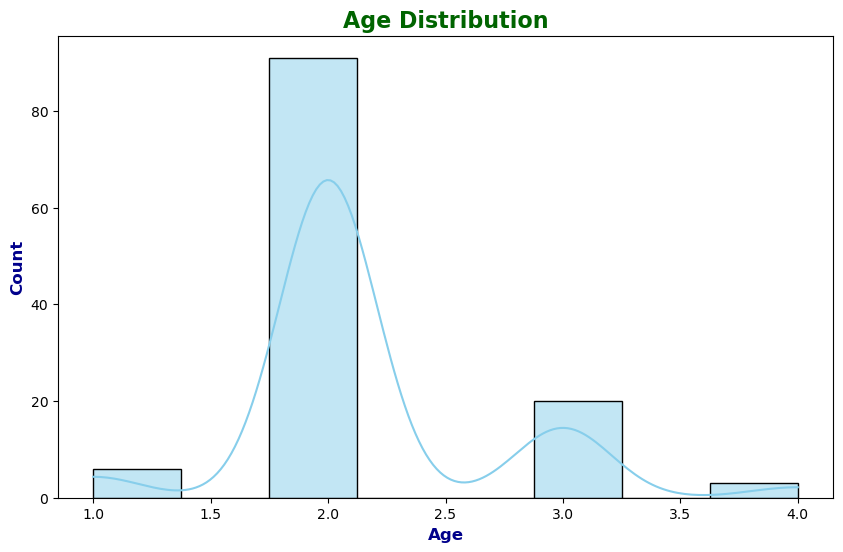

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df["Age"],kde=True,color="skyblue")
plt.xlabel("Age",fontsize=12,fontweight="bold",color="darkblue")
plt.ylabel("Count",fontsize=12,fontweight="bold",color="darkblue")
plt.title("Age Distribution",fontsize=16,fontweight="bold",color="darkgreen")
plt.show()                

# plotting the distribution of attendance

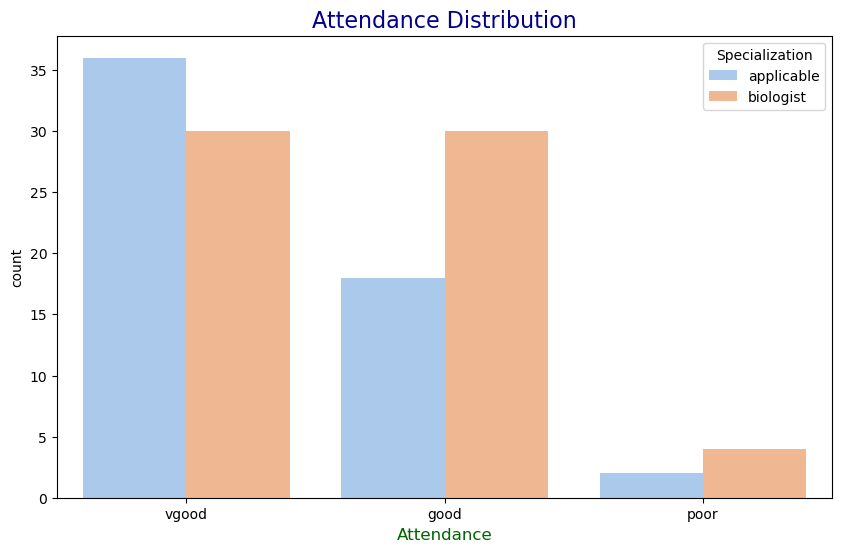

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df["Attendance"],hue="Specialization",data=df,palette="pastel")
plt.xlabel("Attendance",fontsize=12,color="darkgreen")
plt.title("Attendance Distribution",fontsize=16,color="darkblue")
plt.legend(title="Specialization",labels=["applicable","biologist"])
plt.show()

In [12]:
## selecting Numeric Features

numeric_features=df[["Islamea","arabic","english","math","physics","chemistry","economy/bio","Avg1","Islamea.1","arabic.1","english.1",
                    "math.1","physics.1","chemistry.1","economy/bio.1","Avg1.1"]]


# plotting the Boxplot for selecting numeric features 

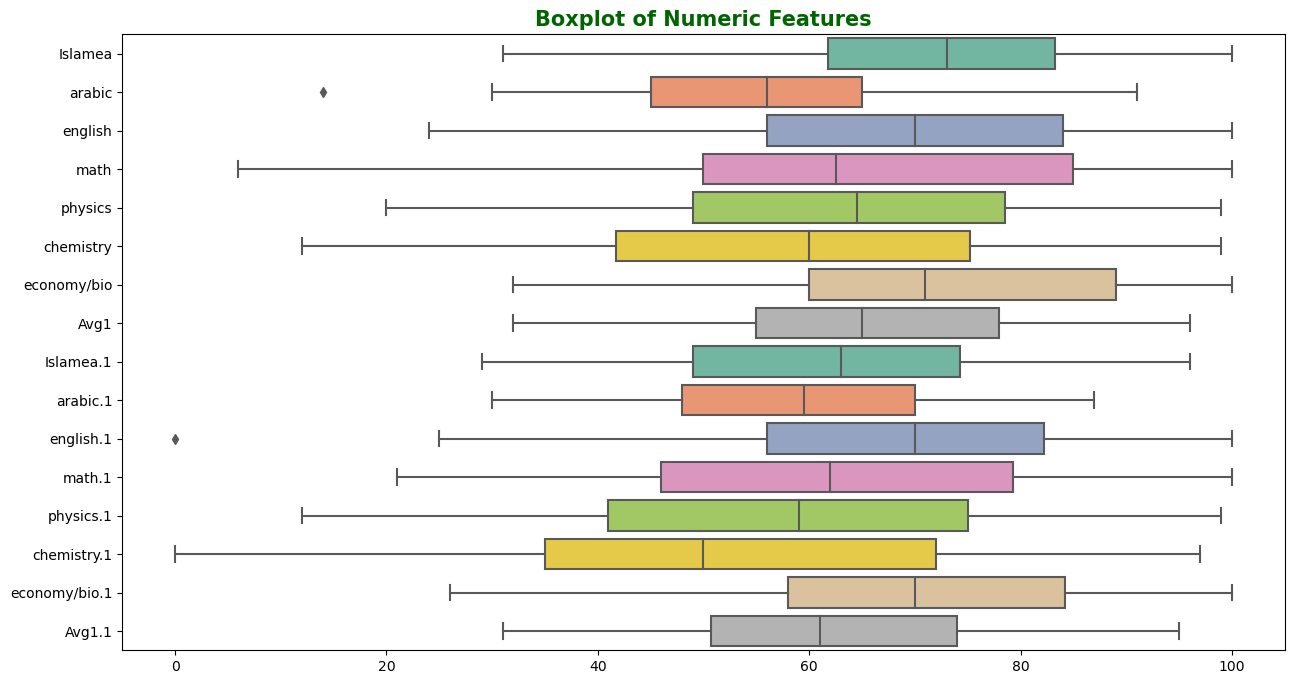

In [13]:
## Box plots for selected numeric features

plt.figure(figsize=(15,8))
sns.boxplot(data=numeric_features,orient="h",palette="Set2")
plt.title("Boxplot of Numeric Features",fontsize=15,fontweight="bold",color="darkgreen")
plt.show()

In [14]:
age_stats=df["Age"].describe()
age_stats

count    120.000000
mean       2.166667
std        0.539737
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Age, dtype: float64

In [15]:
results_table=pd.DataFrame({
                            "statistics":["mean","median","min","max","std.dev"],
                             'Value': [age_stats['mean'], age_stats['50%'], age_stats['min'], age_stats['max'], age_stats['std']]
})

print(results_table)

  statistics     Value
0       mean  2.166667
1     median  2.000000
2        min  1.000000
3        max  4.000000
4    std.dev  0.539737


In [16]:
## heatmap of catogorical data

numeric_data=df.select_dtypes(include=["number"])
correlation_matrix=numeric_data.corr()

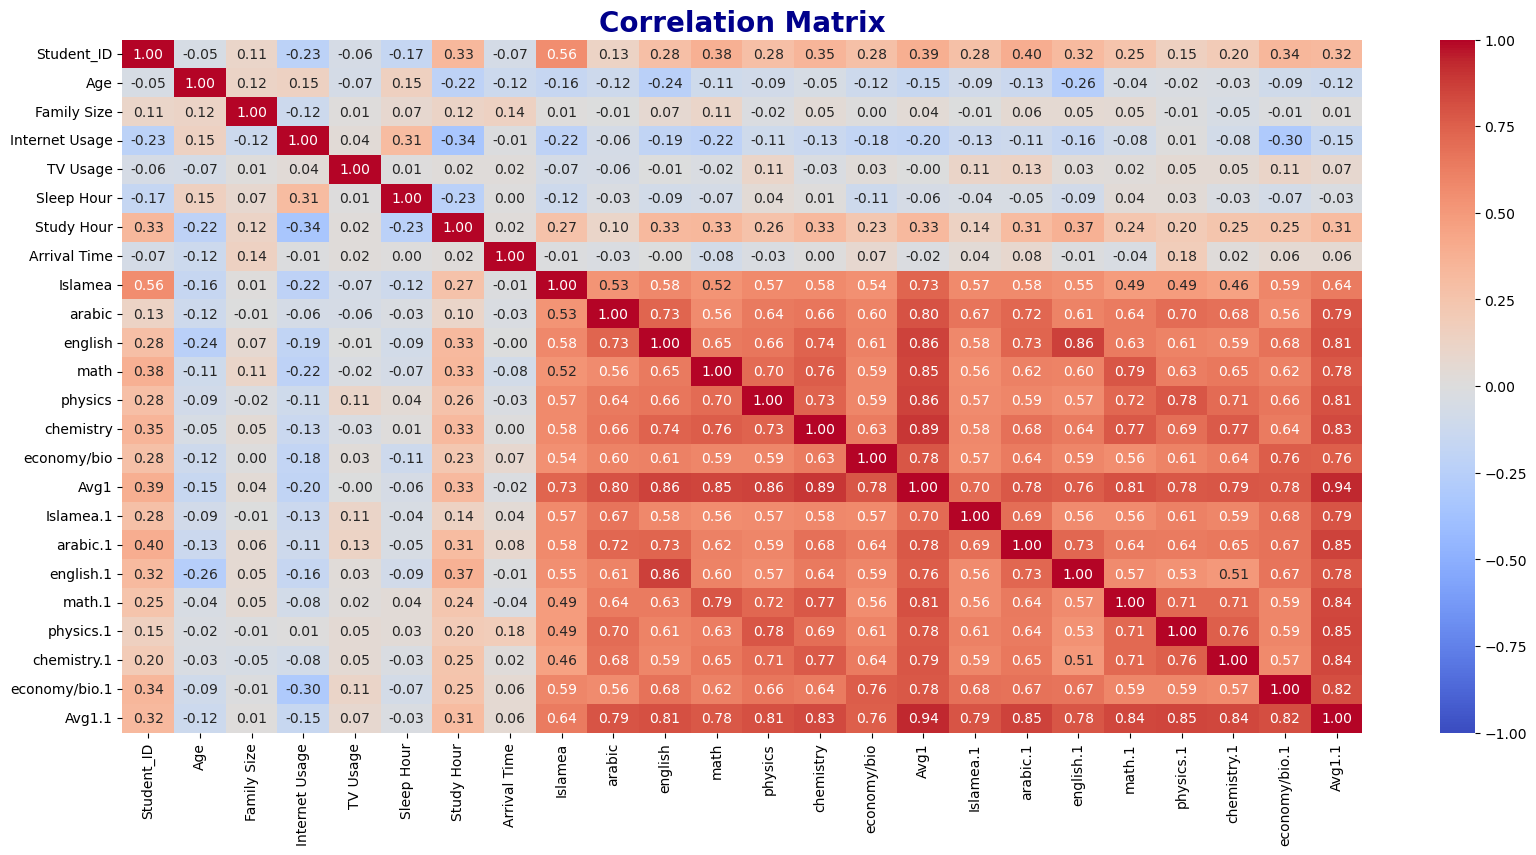

In [17]:
plt.figure(figsize=(20,9))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",vmin=-1,vmax=1)
plt.title("Correlation Matrix",fontsize=20,fontweight="bold",color="darkblue")
plt.show()

In [18]:
df

,Student_ID,Sex,Social Status,Age,Governorate,Living,Mother education,Father education,Family member Education,Father Alive,...,economy/bio,Avg1,Islamea.1,arabic.1,english.1,math.1,physics.1,chemistry.1,economy/bio.1,Avg1.1
0,1,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,70,55,69,50,60,41,59,50,69,57
1,2,Male,single,3,baghdad,city,medium,higher,yes,yes,...,87,70,65,87,68,85,64,61,69,71
2,3,Male,single,2,baghdad,city,Illiterate,secondary,no,yes,...,58,54,44,50,46,45,55,30,43,45
3,4,Male,coupled,3,baghdad,city,ba,ba,yes,yes,...,92,73,60,55,60,55,70,73,80,65
4,5,Male,single,2,baghdad,city,secondary,secondary,yes,yes,...,60,34,40,32,28,25,35,25,40,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Female,single,2,baghdad,city,medium,secondary,yes,yes,...,97,90,75,75,89,69,75,86,89,80
116,117,Female,coupled,3,baghdad,city,medium,ba,yes,yes,...,70,56,65,65,80,45,39,49,65,58
117,118,Female,single,2,baghdad,city,medium,medium,no,no,...,84,67,54,69,74,76,69,40,84,67
118,119,Female,single,4,other,city,medium,secondary,yes,yes,...,63,78,63,61,63,75,69,67,73,67


In [19]:
# Handling missing values
df= df.dropna()

In [20]:
categorical_features= ['Sex', 'Social Status', 'Governorate', 'Living',
                        'Mother education', 'Father education', 'Family member Education',
                        'Father Alive', 'Mother Alive', 'Parent Apart',
                        'The Guardian', 'Family Relationship', 'Father Job', 'Mother Job',
                        'Education Fee', 'Secondary Job', 'Home Ownership', 'Study Room',
                        'Family Economic Level', 'You  chronic disease',
                        'Family Chronic Disease', 'Specialization', 'Study willing',
                        'Reason of study', 'Attendance', 'Failure Year',
                        'Higher Education Willing', 'References Usage', 'Internet Usage',
                        'TV Usage', 'Sleep Hour', 'Study Hour', 'Arrival Time', 'Transport',
                        'Holiday Effect', 'Worry Effect', 'Parent Meeting']


In [21]:
## fill the missing values with the most common catagory

for feature in categorical_features:
    most_common_category=df[feature].mode()[0]
    df[feature].fillna(most_common_category,inplace=True)


In [22]:
## check missing values

df.isna().sum()

Student_ID                  0
Sex                         0
Social Status               0
Age                         0
Governorate                 0
Living                      0
Mother education            0
Father education            0
Family member Education     0
Father Alive                0
Mother Alive                0
Family Size                 0
Parent Apart                0
The Guardian                0
Family Relationship         0
Father Job                  0
Mother Job                  0
Education Fee               0
Secondary Job               0
Home Ownership              0
Study Room                  0
Family Economic Level       0
You  chronic disease        0
Family Chronic Disease      0
Specialization              0
Study willing               0
Reason of study             0
Attendance                  0
Failure Year                0
Higher Education Willing    0
References Usage            0
Internet Usage              0
TV Usage                    0
Sleep Hour

In [23]:
##  Encoding Categarical Variables

data_encoded=pd.get_dummies(df,columns=categorical_features,drop_first=True)


In [24]:
## separating features(x) and target (y)

x=data_encoded.drop(columns=["Avg1.1"])
y=data_encoded["Avg1.1"]

In [25]:
## splitting tha data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Evolution

 Different machine learning algorithms will be tested and evaluated to determine the most suitable model for predicting student performance. Metrics like Mean squared Error (MSE) accuracy will be used to assess model performance.

In [26]:
## finding the mean squared error values

from sklearn.metrics import mean_squared_error

## Linear Regression

In [27]:
##  Model Training

from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [28]:
## Model Evolution

lr_model_pred=lr_model.predict(x_test)

In [29]:
## Evolute The Model (mean_squared_error)
 
mse=mean_squared_error(lr_model_pred,y_test)
print(f"Linear_Regression MSE : {mse}" )

Linear_Regression MSE : 0.29037198633447475


# 

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor

## Model Training

rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model_pred=rf_model.fit(x_train,y_train)

In [31]:
##  Model Evolution

y_pred=rf_model.predict(x_test)
rf_mse=mean_squared_error(y_test,y_pred)

In [32]:
print(f"Random_Forest MSE : {rf_mse}")

Random_Forest MSE : 93.06757999999999


#   
    
##  Support Vector Machine (SVM)    

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [34]:
## Data Precessing

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
## Model Training

svm_model=SVR(kernel="linear")
svm_model.fit(x_train_scaled,y_train)

SVR(kernel='linear')

In [36]:
y_pred_svm=svm_model.predict(x_test_scaled)
svm_mse=mean_squared_error(y_test,y_pred_svm)
print(f"Spport_Vector_Machine MSE : {svm_mse}")

Spport_Vector_Machine MSE : 15.854447873325583


# 
## K - Nearest Neighbour (KNN)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
##  Data Processing

knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [39]:
## Model Evolution

y_pred_knn=knn_model.predict(x_test)
knn_mse=mean_squared_error(y_test,y_pred_knn)
print(f"K-Nearest_Neighbour MSE : {knn_mse}")

K-Nearest_Neighbour MSE : 95.37599999999999


# 
## Gradient Boosting



In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
## model training

gb_model=GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
## Model Evolution

y_pred_gb=gb_model.predict(x_test)
gb_mse=mean_squared_error(y_test,y_pred_gb)
print(f"Gradiet_Boosting MSE : {gb_mse}")

Gradiet_Boosting MSE : 89.49434302230013


## Best model

#### Based on these MSE values, the best model is the Linear Regression model with the lowest MSE of 0.29037198633447475. This indicates that the Linear Regression model has the smallest prediction error compared to the other models you mentioned.

The explanation for this result is that Linear Regression is a simple and interpretable model that fits a linear relationship between the input features and the target variable. In this particular dataset or problem, it seems that a linear model is a good fit for the data, and it has minimized the error effectively.

However, it's important to note that the choice of the best model depends on various factors, including the specific problem, the nature of the data, and the trade-off between model complexity and interpretability. The Linear Regression model may be the best for this dataset, but in other scenarios, a more complex model like Random Forest or Gradient Boosting might perform better. It's essential to consider the context and the goals of your analysis when selecting a model for a real-world application.

In [44]:
import pickle
# open a fie, where you want to store the data
file=open("iraq students perfomance web.pkl","wb")
 
# dump information to the file    
pickle.dump(rf_model,file)